In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv(r'C:\Users\KDP-27\Desktop\KDT6\Numpy\예제소스코드모음1\data\ch2_scores_em.csv', index_col='student number')

df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [4]:
scores=np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [5]:
scores_df=pd.DataFrame({'score':scores},
                       index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [6]:
# 평균값
sum(scores)/len(scores)

55.0

In [7]:
np.mean(scores)

55.0

In [8]:
scores_df.mean()

score    55.0
dtype: float64

In [9]:
# 중앙값
sorted_scores=np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [10]:
n = len(sorted_scores)
if n % 2 ==0:
    m0 = sorted_scores[n//2-1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) /2
else :
    median = sorted_scores[(n+1)//2-1]
median

56.5

In [11]:
# 최빈값
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [12]:
# 편차
mean = np.mean(scores)
deviation=scores-mean
deviation


array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [13]:
# 편차비교
summary_df=scores_df.copy()
summary_df['deviation']=deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [14]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

In [15]:
#분산
np.mean(deviation**2)

86.0

In [16]:
np.var(scores)

86.0

In [17]:
scores_df.var()

score    95.555556
dtype: float64

In [18]:
summary_df['square of deviation']=np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [19]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [20]:
#표준편차
np.sqrt(np.var(scores, ddof=0))

9.273618495495704

In [21]:
np.std(scores, ddof=0)

9.273618495495704

In [22]:
np.max(scores)-np.min(scores)

28

In [23]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3= np.percentile(scores,75)
scores_IQR=scores_Q3-scores_Q1
scores_IQR

15.0

In [24]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [25]:
#표준화
z=(scores-np.mean(scores))/np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [26]:
#표준화된 데이터는 평균이 0, 표준편차가 1
np.mean(z), np.std(z, ddof=0)

(-1.6653345369377347e-17, 0.9999999999999999)

In [27]:
# 평균이 50, 표준편차가 10이 되도록 정규화한 값
z=50+10*(scores-np.mean(scores)) / np.std(scores)
z

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [28]:
scores_df['deviation value']=z
scores_df

,score,deviation value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


In [29]:
# 50명의 여어 점수 array
english_scores=np.array(df['english'])
english_scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66],
      dtype=int64)

In [30]:
# series로 변화하여 describe를 표시
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [31]:
freq,_=np.histogram(english_scores,bins=10,range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [32]:
freq=np.histogram(english_scores,bins=10,range=(0,100))
freq

(array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]))

In [33]:
freq,_=np.histogram(english_scores,bins=10,range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [34]:
values=1,2,3,4,5
a,b,*_=values
a,b

(1, 2)

In [35]:
values=1,2,3,4,5
a,b,_=values

ValueError: too many values to unpack (expected 3)

In [36]:
values=1,2,3
a,b,_=values

In [37]:
a,b

(1, 2)

In [38]:
# 0~10, 10~20, ... 이라는 문자열의 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
# freq_class를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({'frequency':freq},
                            index=pd.Index(freq_class,
                                           name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [39]:
#각 계급을 대표하는 값으로, 계급의 중앙값을 이용
class_value=[(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [40]:
#상대도수 : 전체 데이터에 대해서 해당 계급의 데이터가 차지하는 비율
rel_freq=freq/freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [41]:
cum_rel_freq=np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [42]:
#계급값, 상대도수 ,누적상대도수를 도수분포표에 추가
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency',
                             'relative frequency', 'cumulative relative frequency']]

freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [43]:
#최빈값
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class value']

65

In [44]:
#히스토그램
import matplotlib.pyplot as plt

#그래프가 jupter notebook위에 표시
%matplotlib inline

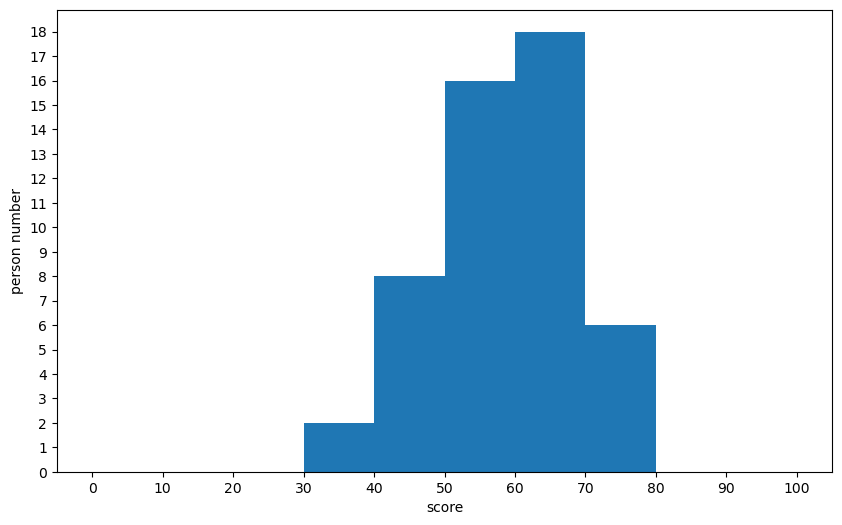

In [45]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
freq,_,_= ax.hist(english_scores,bins=10,range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()

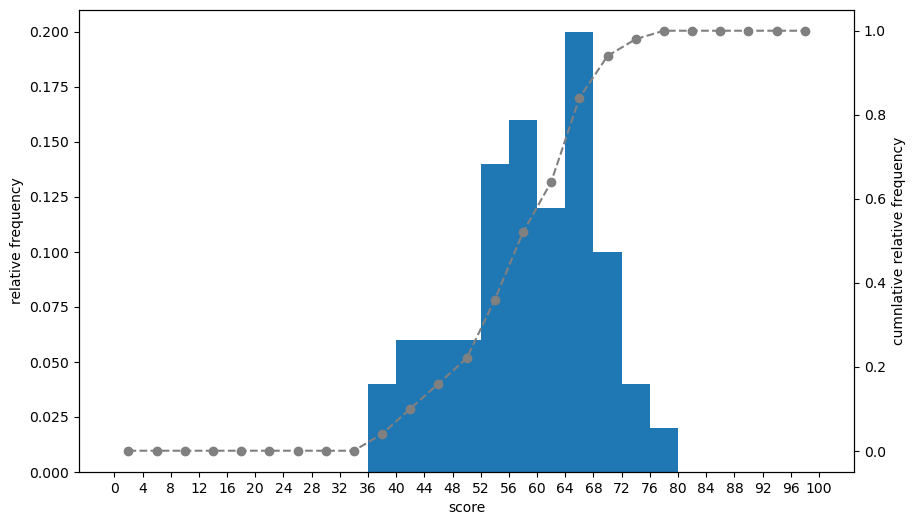

In [46]:
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(111)

ax2=ax1.twinx()

weights=np.ones_like(english_scores)/len(english_scores)
rel_freq,_,_=ax1.hist(english_scores, bins=25, range=(0,100), weights=weights)
cum_rel_freq=np.cumsum(rel_freq)
class_value=[(i+(i+4))//2 for i in range(0,100,4)]
ax2.plot(class_value, cum_rel_freq,
         ls='--', marker='o', color='gray')
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumnlative relative frequency')
ax1.set_xticks(np.linspace(0,100,25+1))
plt.show()

C:\Users\KDP-27\AppData\Local\Temp\ipykernel_6736\1381989562.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(english_scores, labels=['english'])


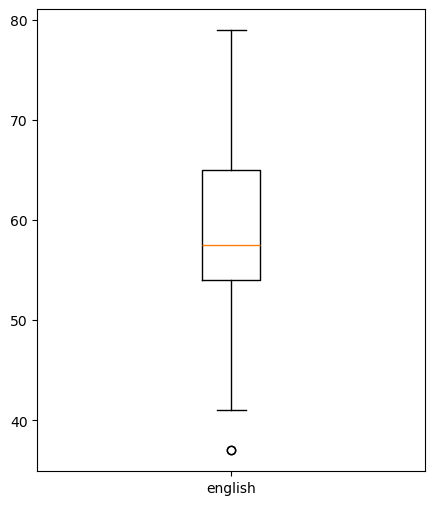

In [47]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])

plt.show()

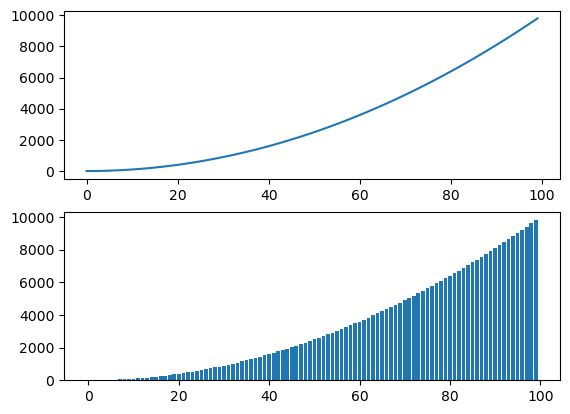

In [49]:
fig=plt.figure()
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)

x=range(0,100)
y = [v*v for v in x]

ax1.plot(x,y)
ax2.bar(x,y)

plt.show()